In [90]:
#load data
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

df = pd.read_csv("/content/Walmart_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


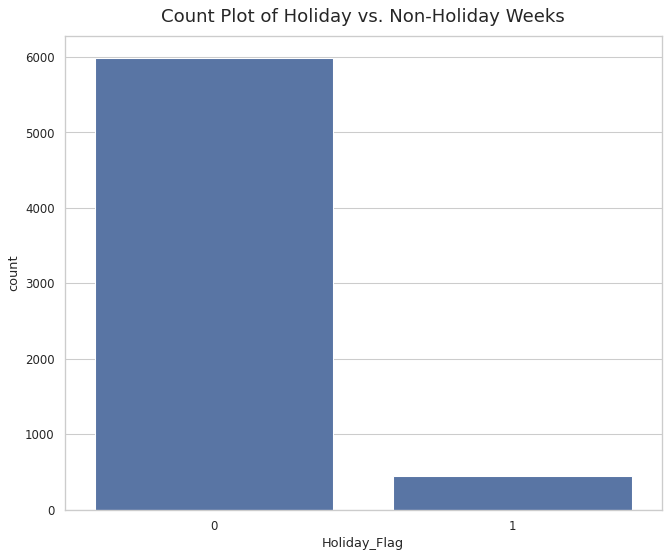

In [91]:
#Count Plot of Holiday vs. Non-Holiday Weeks:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Holiday_Flag'])
plt.title("Count Plot of Holiday vs. Non-Holiday Weeks", size=17, pad= 13)
plt.show()

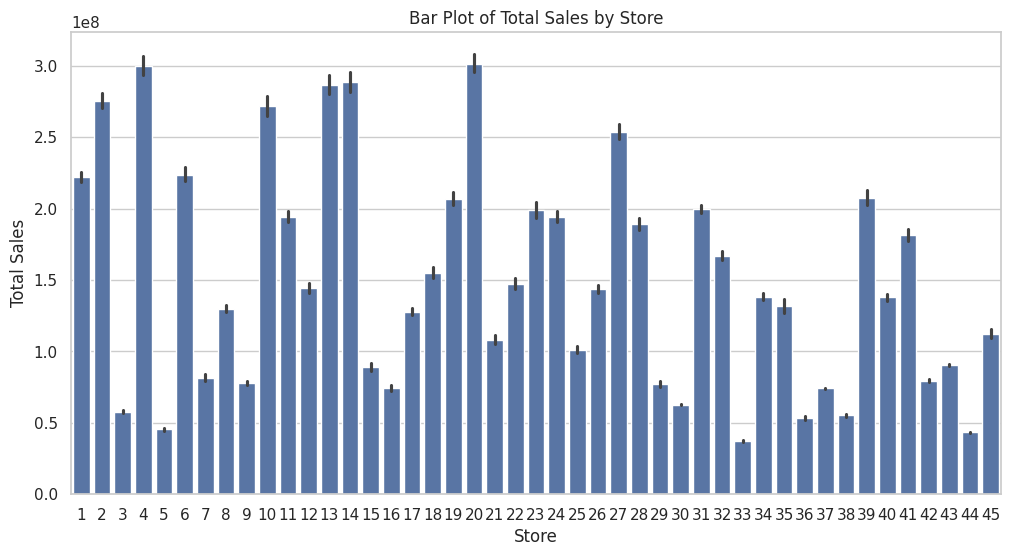

In [92]:
#Bar Plot of Total Sales by Store:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Store", y="Weekly_Sales", estimator='sum')
plt.title("Bar Plot of Total Sales by Store" )
plt.ylabel('Total Sales')
plt.show()


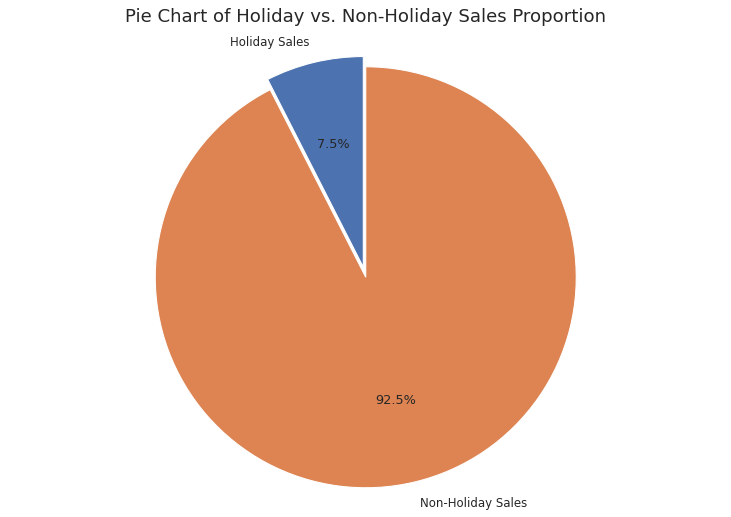

In [93]:
#Pie Chart of Holiday vs. Non-Holiday Sales Proportion:
holiday_sales =df[df['Holiday_Flag']==1]['Weekly_Sales'].sum()
nonholiday_sales =df[df['Holiday_Flag']==0]['Weekly_Sales'].sum()
proportions = [holiday_sales,nonholiday_sales]

plt.figure(figsize=(12,8),dpi=77)
plt.pie(proportions,data=df,labels=['Holiday Sales','Non-Holiday Sales'],explode=(0.05,0),startangle=90,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Holiday vs. Non-Holiday Sales Proportion",size=17,pad=13)
plt.show()


<ipython-input-94-ad7d886b27d4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month']=pd.to_datetime(df['Date']).dt.month


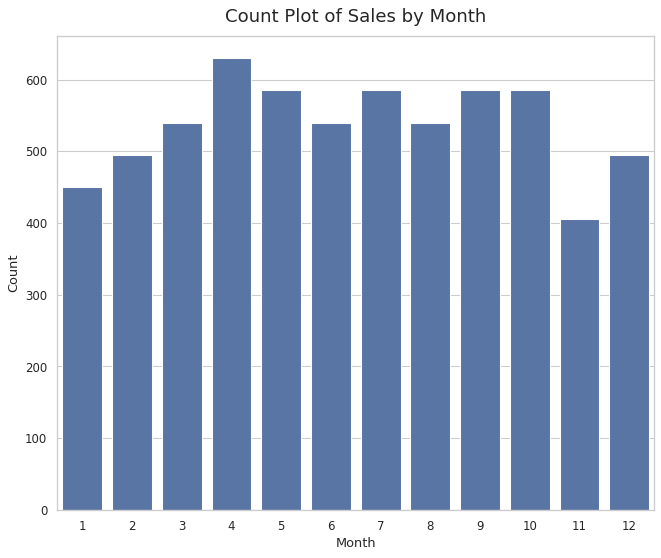

In [94]:
#Count Plot of Sales by Month:
df['Month']=pd.to_datetime(df['Date']).dt.month
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Month'])
plt.title("Count Plot of Sales by Month", size=17, pad= 13)
plt.ylabel('Count')
plt.show()

<ipython-input-95-3c1dd27f4ffd>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Month = pd.to_datetime(df['Date']).dt.month


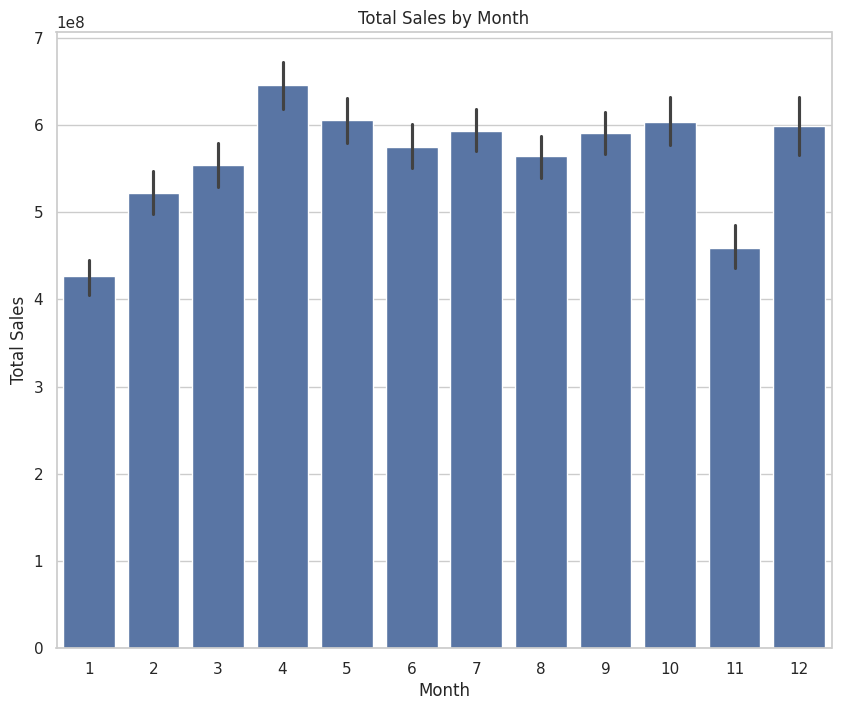

In [95]:
#Bar Plot of Total Sales by Month:
Month = pd.to_datetime(df['Date']).dt.month

plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="Month", y="Weekly_Sales", estimator='sum')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-96-5fe9edecb7b1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Month = pd.to_datetime(df['Date']).dt.month


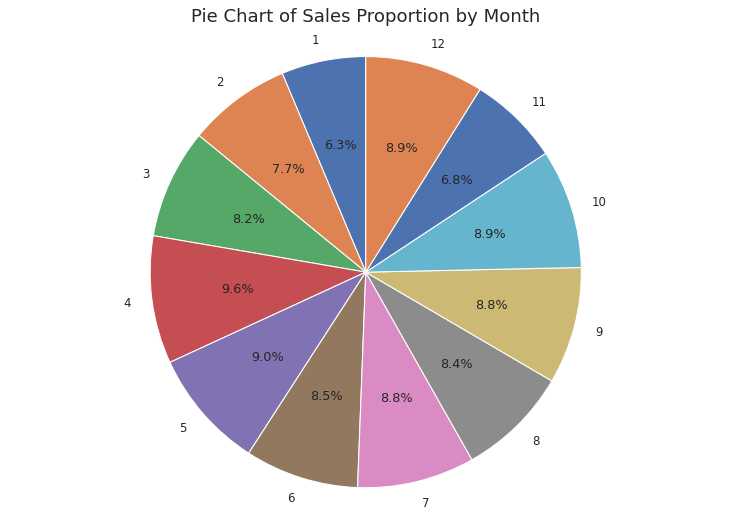

In [96]:
#Pie Chart of Sales Proportion by Month:
Month = pd.to_datetime(df['Date']).dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 8), dpi=77)
plt.pie(monthly_sales, labels=monthly_sales.index, startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Sales Proportion by Month", size=17, pad=13)
plt.show()

<ipython-input-97-8dc6e04b1d58>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()


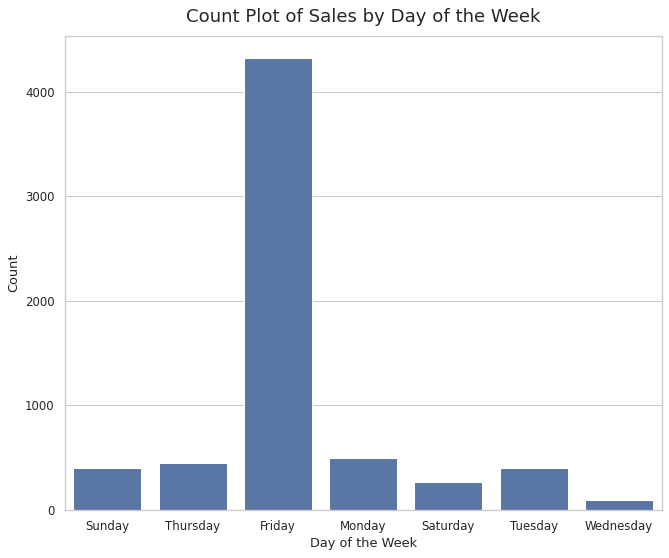

In [97]:
#Count Plot of Sales by Day of the Week:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
plt.figure(figsize = (10,8), dpi=77)
sns.countplot(x = df['Day of the Week'])
plt.title("Count Plot of Sales by Day of the Week", size=17, pad= 13)
plt.ylabel('Count')
plt.show()


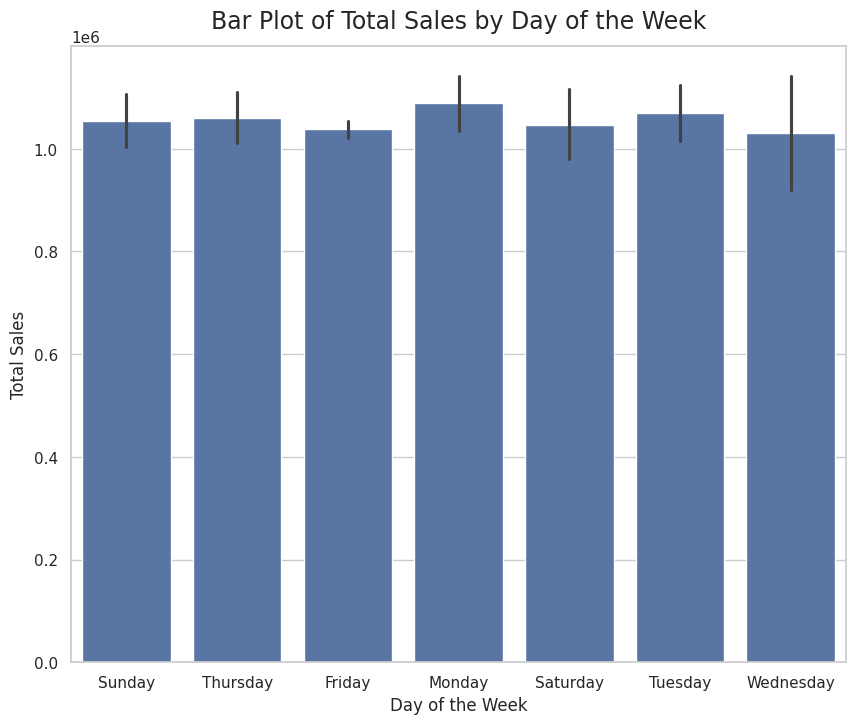

In [98]:
#Bar Plot of Total Sales by Day of the Week:
daily_sales = df.groupby('Day of the Week')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(data=df, x="Day of the Week", y="Weekly_Sales")
plt.title("Bar Plot of Total Sales by Day of the Week", size=17, pad=13)
plt.ylabel('Total Sales')
plt.show()

<ipython-input-99-afa819d3fa30>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()


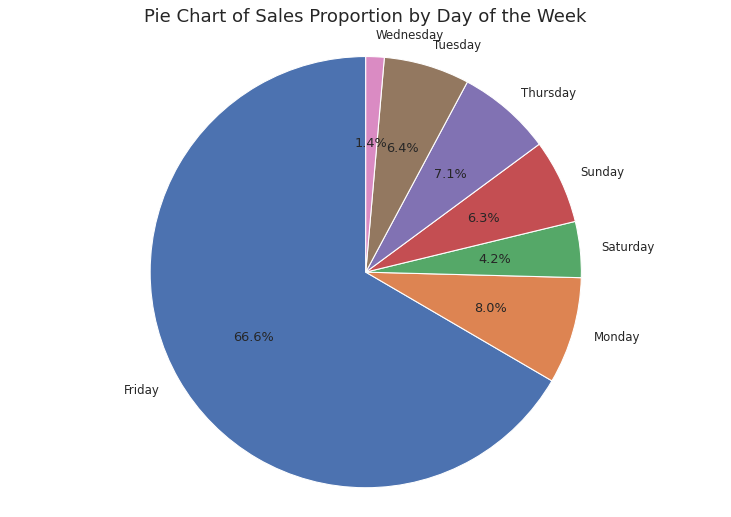

In [99]:
#Pie Chart of Sales Proportion by Day of the Week:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
daily_sales = df.groupby('Day of the Week')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 8), dpi=77)
plt.pie(daily_sales, labels=daily_sales.index, startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Sales Proportion by Day of the Week", size=17, pad=13)
plt.show()


In [100]:
#bonus marks if you explore and do 5 exclusive pots of your own idea

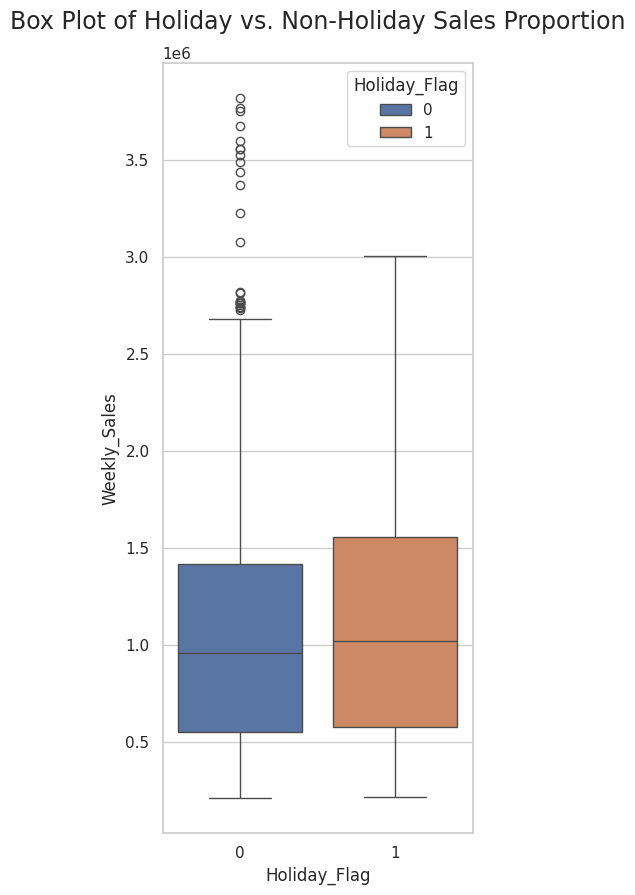

In [101]:
#Box Plot of Holiday vs. Non-Holiday Sales Proportion

plt.figure(figsize=(4,10),dpi=100)
sns.boxplot(data=df, x="Holiday_Flag", y="Weekly_Sales", hue="Holiday_Flag")
plt.title("Box Plot of Holiday vs. Non-Holiday Sales Proportion",size=17,pad=13)
plt.show()


<ipython-input-102-25786ab19c1f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Month = pd.to_datetime(df['Date']).dt.month


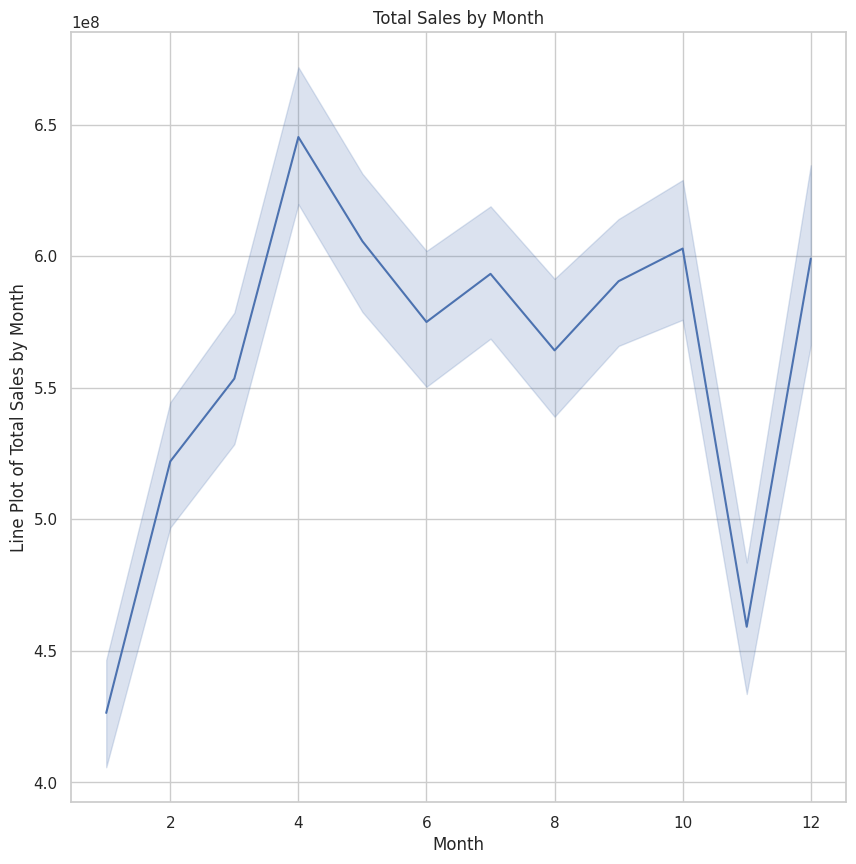

In [102]:
#Line Plot of Total Sales by Month:
Month = pd.to_datetime(df['Date']).dt.month

plt.figure(figsize=(10, 10),dpi=100)
sns.lineplot(data=df, x="Month", y="Weekly_Sales",estimator='sum')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Line Plot of Total Sales by Month')
plt.show()


<ipython-input-103-3301b2a6c399>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
<ipython-input-103-3301b2a6c399>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


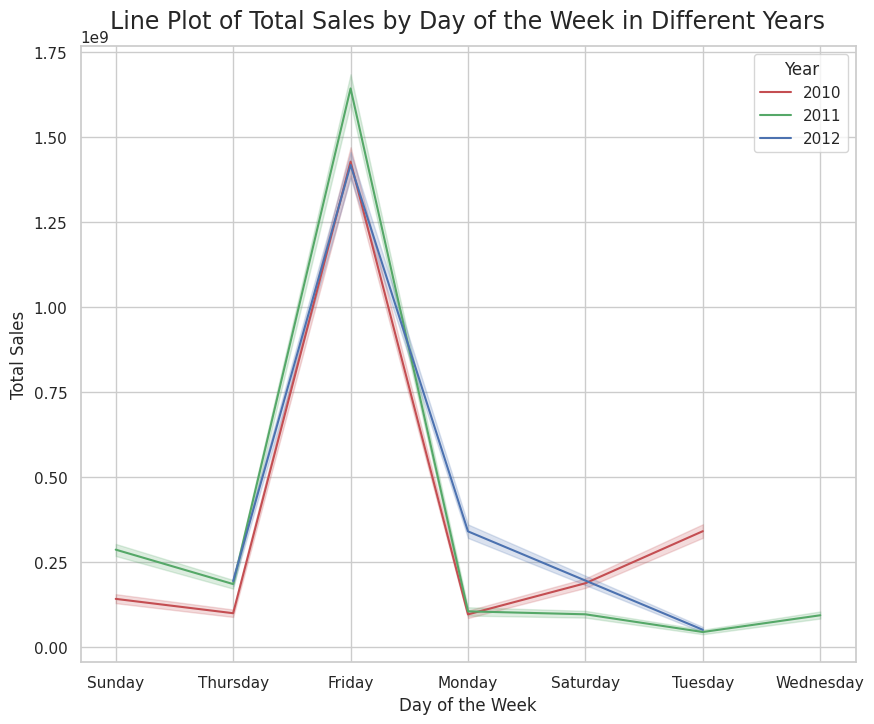

In [103]:
#Line Plot of Total Sales by Day of the Week in Different Years:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
df['Year'] = pd.to_datetime(df['Date']).dt.year
daily_sales = df.groupby('Day of the Week')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(10, 8), dpi=100)
sns.lineplot(data=df, x="Day of the Week", y="Weekly_Sales", hue="Year",palette=['r','g','b'],estimator='sum')
plt.title("Line Plot of Total Sales by Day of the Week in Different Years", size=17, pad=13)
plt.ylabel('Total Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

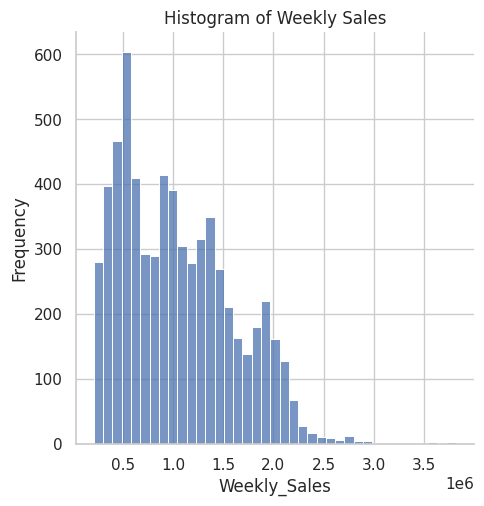

In [104]:
#Histogram of Weekly Sales
plt.figure(figsize=(10, 6))
sns.displot(data=df,x='Weekly_Sales')
plt.title('Histogram of Weekly Sales')
plt.ylabel('Frequency')
plt.show()



<Figure size 1000x800 with 0 Axes>

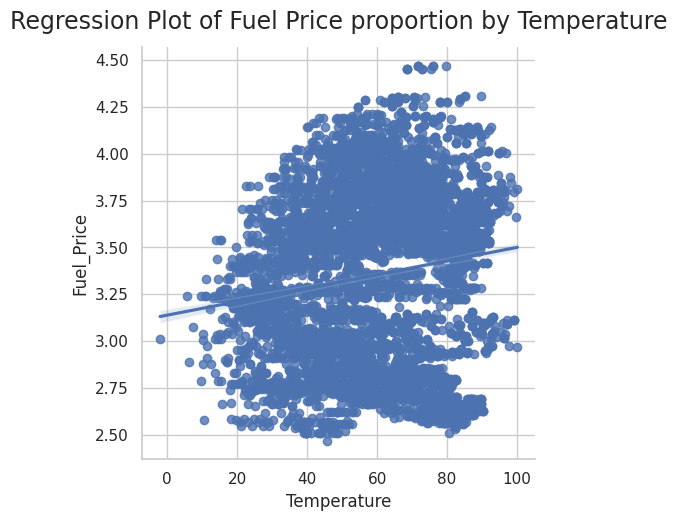

In [105]:
#Regression Plot of Fuel Price proportion by Temperature:
plt.figure(figsize=(10, 8), dpi=100)
sns.lmplot(data=df, x="Temperature", y="Fuel_Price")
plt.title("Regression Plot of Fuel Price proportion by Temperature", size=17, pad=13)
plt.show()